In [2]:
import pickle
ofname = open("dataset_small.pkl","rb") # x stores input data and y target values
(x,y) = pickle.load(ofname,encoding="latin1")

In [3]:
x

array([[ 3.6000e+03,  2.3750e+03,  7.6310e+01, ..., -1.0000e+00,
        -1.0000e+00,  1.0000e+00],
       [ 2.3000e+04,  2.3000e+04,  7.6789e+02, ..., -1.0000e+00,
        -1.0000e+00,  1.0000e+00],
       [ 7.0000e+03,  7.0000e+03,  2.2584e+02, ..., -1.0000e+00,
        -1.0000e+00,  1.0000e+00],
       ...,
       [ 1.0000e+04,  1.0000e+04,  3.1111e+02, ..., -1.0000e+00,
        -1.0000e+00,  1.0000e+00],
       [ 3.5000e+03,  3.5000e+03,  1.1961e+02, ..., -1.0000e+00,
        -1.0000e+00,  1.0000e+00],
       [ 8.3250e+03,  8.3250e+03,  2.8248e+02, ..., -1.0000e+00,
        -1.0000e+00,  1.0000e+00]])

In [4]:
y

array([ 1.,  1.,  1., ..., -1., -1., -1.])

In [420]:
import numpy as np
X = np.loadtxt("data.csv",delimiter=",")
print("feature matrix has shape",X.shape)
y = np.loadtxt("labels.csv",delimiter=",")
print("label vector has shape",y.shape)


feature matrix has shape (4140, 15)
label vector has shape (4140,)


In [81]:
X[0,:5]

array([3.600e+03, 2.375e+03, 7.631e+01, 3.000e+04, 1.504e+01])

In [82]:
y[-6:]

array([-1., -1., -1., -1., -1., -1.])

In [109]:
from sklearn import neighbors as nbr 
knn = nbr.KNeighborsClassifier(n_neighbors=11)   # specification
knn.fit(x, y)   # training
yhat = knn.predict(x)   # prediction
yhat[-6:]

array([-1., -1., -1., -1., -1., -1.])

In [84]:
n = len(y)
acc = sum(yhat==y)/n
print(f"accuracy is {acc:.1%}")

accuracy is 83.2%


In [85]:
rejected = sum(y==-1)
print(f"{rejected/n:.1%} were rejected")


81.6% were rejected


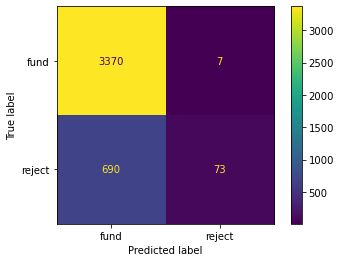

In [103]:
from sklearn import metrics
C = metrics.confusion_matrix(y,yhat,labels=[-1,1])
lbl = ["fund","reject"]
metrics.ConfusionMatrixDisplay(C,display_labels=lbl).plot()

In [108]:
TP,FN,FP,TN = C.ravel()
print(f"recall = {TP/(TP+FN):.1%}")
print(f"specificity = {TN/(TN+FP):.1%}")
print(f"precision = {TP/(TP+FP):.1%}")
print(f"NPV = {TN/(TN+FN):.1%}")


recall = 100.0%
specificity = 100.0%
precision = 100.0%
NPV = 100.0%


In [105]:
sum(np.logical_and(y==-1,yhat==1))

7

In [106]:
FN

7

In [120]:
acc = []
n = len(y_te)

for k in range(1,13):
    knn = nbr.KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_tr,y_tr)  
    yhat = knn.predict(X_te) 
    agree = sum(yhat==y_te)
    acc.append(agree/n)

print(acc)



[0.7355072463768116, 0.8067632850241546, 0.7958937198067633, 0.8152173913043478, 0.8043478260869565, 0.8115942028985508, 0.8128019323671497, 0.8164251207729468, 0.8164251207729468, 0.8176328502415459, 0.8152173913043478, 0.8176328502415459]


In [114]:
yhat = knn.predict(X_tr) 
C = metrics.confusion_matrix(y_tr,yhat,labels=[-1,1])
print(C)
print(len(y_tr),"training values and",len(y_te),"test values")


[[2707    0]
 [   0  605]]
3312 training values and 828 test values


In [110]:
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.2)

In [115]:
yhat = knn.predict(X_te) 
C = metrics.confusion_matrix(y_te,yhat,labels=[-1,1])
print(C)


[[560 110]
 [109  49]]


In [122]:
from sklearn.model_selection import cross_val_score

knn = nbr.KNeighborsClassifier(n_neighbors=6)   # specification
knn.fit(X,y)   # training
scores = cross_val_score(knn,X,y,cv=5)

In [123]:
scores

array([0.82729469, 0.81521739, 0.81884058, 0.82729469, 0.81884058])

In [124]:
scores.mean()

0.8214975845410628

In [126]:
print(scores)
print("mean:",scores.mean(),"\nstd: ",scores.std())


[0.82729469 0.81521739 0.81884058 0.82729469 0.81884058]
mean: 0.8214975845410628 
std:  0.004914731871829926


In [141]:
from sklearn import tree
dt = tree.DecisionTreeClassifier() 
dt.fit(X,y)   # training
scores = cross_val_score(dt,X,y,cv=5)

print(scores)
print("mean:",scores.mean(),"\nstd: ",scores.std())


[0.76811594 0.78864734 0.78623188 0.7705314  0.74758454]
mean: 0.7722222222222223 
std:  0.014783713766279575


In [150]:
import numpy as np
from numpy import random
rand = np.random.rand

n = 20
x_blue = rand(n,2)
x_blue[:,0] -= 0.4
x_red = rand(n,2)
x_red[:,0] += 0.4


TypeError: cannot unpack non-iterable PathCollection object

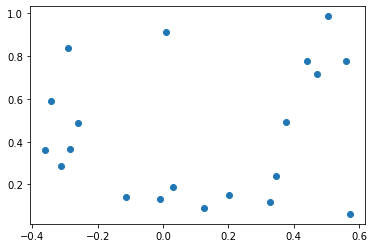

In [153]:
import matplotlib.pyplot as plt
plt.scatter(x_blue[:,0],x_blue[:,1])

In [208]:
# import numpy as np
# X = np.loadtxt("data.csv",delimiter=",")
# y = np.loadtxt("labels.csv",delimiter=",")
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(Z,y,test_size=0.2)


acc = []
n = len(y_te)

for k in range(1,13):
    knn = nbr.KNeighborsClassifier(n_neighbors=k,weights="distance") 
    knn.fit(X_tr,y_tr)  
    yhat = knn.predict(X_te) 
    agree = sum(yhat==y_te)
    acc.append(agree/n)

print(acc)


[0.8656716417910447, 0.8656716417910447, 0.835820895522388, 0.8507462686567164, 0.8208955223880597, 0.8208955223880597, 0.8208955223880597, 0.8059701492537313, 0.8059701492537313, 0.8059701492537313, 0.8059701492537313, 0.8208955223880597]


In [163]:
np.mean(np.abs(X),axis=0)

array([1.10554227e+04, 1.08081341e+04, 3.22625471e+02, 6.80402478e+04,
       1.33470242e+01, 1.58454106e-01, 2.22106280e+01, 1.22790942e-01,
       1.25990338e+00, 4.78260870e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

In [157]:
np.mean(X,axis=0)

array([ 1.10554227e+04,  1.08081341e+04,  3.22625471e+02,  6.80402478e+04,
        1.33470242e+01,  1.58454106e-01,  2.22106280e+01,  1.22790942e-01,
        1.25990338e+00,  4.78260870e+00, -1.05797101e-01, -9.99516908e-01,
       -9.95652174e-01, -8.61352657e-01, -3.76811594e-02])

In [158]:
np.std(X,axis=0)


array([7.22681566e+03, 6.99523413e+03, 2.03357790e+02, 5.68771352e+04,
       6.72125395e+00, 5.83603272e-01, 1.16274323e+01, 3.63541121e-02,
       4.38581365e-01, 3.54625569e+00, 9.94387738e-01, 3.10797393e-02,
       9.31490665e-02, 5.08007481e-01, 9.99289813e-01])

In [203]:
Z = (X - np.mean(X,axis=0)) / np.std(X,axis=0)
Z

array([[-0.89604189,  0.7807321 , -1.42675157, -0.56847478],
       [-0.82278787,  0.11958397, -1.06947358, -0.50628618],
       [-0.67627982,  0.42472926, -0.42637319, -1.1903608 ],
       ...,
       [ 1.17338426, -0.74499437,  1.50292796,  1.91906927],
       [ 0.22108196, -1.20271231,  0.78837197,  1.23499466],
       [ 1.08181673, -0.54156417,  0.85982757,  1.48374906]])

In [376]:
import seaborn as sns
df = sns.load_dataset("penguins")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [381]:
X,y = np.array( df[["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"]] ),df["species"]

In [378]:
df = df.dropna()

In [188]:
pd.factorize(df.species)

/var/folders/cn/8w40979d27x0kv2wsnx7zgvm0000gp/T/ipykernel_54284/929829175.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y = np.array(pd.factorize(df.species))


In [186]:
import pandas as pd

In [199]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
y=LE.fit_transform(df.species)

In [217]:
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.2)

knn = nbr.KNeighborsClassifier(n_neighbors=3) 
knn.fit(X_tr,y_tr)
knn.score(X_te,y_te)


0.8059701492537313

In [239]:
from sklearn.model_selection import cross_val_score,KFold

knn = nbr.KNeighborsClassifier(n_neighbors=5)   # specification
knn.fit(X,df.species)   # training
cv = KFold(n_splits=6,shuffle=True,random_state=0)
scores = cross_val_score(knn,X,df.species,cv=6)

print(scores)


[0.73214286 0.78571429 0.67857143 0.76363636 0.83636364 0.92727273]


In [228]:
knn.predict(X_tr)

/Users/driscoll/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie',
       'Chinstrap', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo',
       'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Chinstrap',
       'Adelie', 'Chinstrap', 'Chinstrap', 'Gentoo', 'Gentoo',
       'Chinstrap', 'Adelie', 

In [233]:
np.mean(Z,axis=0)

array([ 3.84077154e-16,  6.40128591e-16,  2.13376197e-16, -1.70700958e-16])

In [242]:
import numpy as np
X = np.loadtxt("data.csv",delimiter=",")
y = np.loadtxt("labels.csv",delimiter=",")
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.2)
from sklearn import neighbors as nbr 
knn = nbr.KNeighborsClassifier(n_neighbors=3) 
knn.fit(X_tr,y_tr)  

from sklearn import metrics
yhat = knn.predict(X_tr) 
C = metrics.confusion_matrix(y_tr,yhat,labels=[-1,1])
print(C)


[[2628   79]
 [ 341  264]]


In [263]:
train_err = []
test_err = []

K = range(1,21)
for k in K:
    knn = tree.DecisionTreeClassifier(max_depth=k) 
    knn.fit(X_tr,y_tr)
    train_err.append(1-knn.score(X_tr,y_tr))
    test_err.append(1-knn.score(X_te,y_te))



In [ ]:
pd.DataFrame({"k":K,"train":train_err,"test":test_err})

<AxesSubplot:xlabel='depth'>

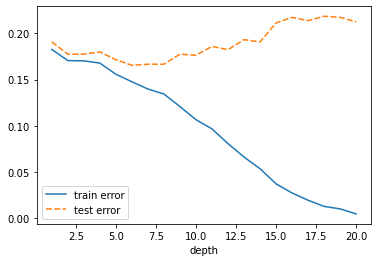

In [266]:
from sklearn import tree

train_err = []
test_err = []
D = range(1,21)

for depth in D:
    t = tree.DecisionTreeClassifier(max_depth=depth) 
    t.fit(X_tr,y_tr)
    train_err.append(1-t.score(X_tr,y_tr))
    test_err.append(1-t.score(X_te,y_te))

import seaborn as sns
result = pd.DataFrame(
    {"train error":train_err,"test error":test_err},
    index=pd.Series(D,name="depth")
)
sns.lineplot(data=result)

In [259]:
from sklearn import tree


In [319]:
import numpy as np
X = np.loadtxt("data.csv",delimiter=",")
y = np.loadtxt("labels.csv",delimiter=",")

from sklearn.model_selection import train_test_split

from sklearn import neighbors as nbr 


In [ ]:

acc = []
for m in range(1000):
    X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.2)
    knn = nbr.KNeighborsClassifier(n_neighbors=1) 
    knn.fit(X_tr,y_tr)
    acc.append(knn.score(X_te,y_te))

In [290]:
acc = []
X_tr, X_m, y_tr, y_m = train_test_split(X,y,test_size=0.2)
for m in range(1000):
    X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.5)
    t = tree.DecisionTreeClassifier(max_depth=60) 
    t.fit(X_tr,y_tr)
    acc.append(t.score(X,y))

In [291]:
np.mean(acc),np.std(acc)

(0.877842995169082, 0.005713880820930739)

In [289]:
np.mean(acc),np.std(acc)


(0.878285265700483, 0.005558740942500484)

In [388]:
from sklearn.utils import shuffle

X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.2)
N = range(10,281)
train_err = []
test_err = []
for n in N:
  X_tr,y_tr = shuffle(X_tr,y_tr,random_state=1)
  knn = nbr.KNeighborsClassifier(n_neighbors=5)   # specification
  knn.fit(X_tr[:n,:],y_tr[:n])   # training
  train_err.append(1-knn.score(X_tr[:n,:],y_tr[:n]))
  test_err.append(1-knn.score(X_te,y_te))


<AxesSubplot:xlabel='size of training set'>

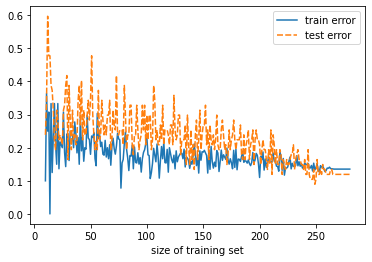

In [389]:
import seaborn as sns
result = pd.DataFrame(
    {"train error":train_err,"test error":test_err},
    index=pd.Series(N,name="size of training set")
)
sns.lineplot(data=result)

In [390]:
X.shape

(333, 4)

In [393]:
from sklearn.model_selection import cross_val_score,KFold

knn = nbr.KNeighborsClassifier(n_neighbors=3)   # specification
kf = KFold(n_splits=6,shuffle=True)
scores = cross_val_score(knn,X,y,cv=kf)

print(scores)
print("mean:",scores.mean(),"\nstd: ",scores.std())


[0.76785714 0.76785714 0.78571429 0.78181818 0.76363636 0.78181818]
mean: 0.7747835497835499 
std:  0.008550468491386862


In [395]:
import seaborn as sns
pen = sns.load_dataset("penguins")
pen = pen.dropna()
pen

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [396]:
X = pen[["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"]]
y = pen["species"]


In [424]:
from sklearn import neighbors as nbr 
K = range(1,10)
score_mean = []
score_std = []
kf = KFold(n_splits=10,shuffle=True,random_state=1)
for k in K:
    t = tree.DecisionTreeClassifier(max_depth=k)
    scores = cross_val_score(t,X,y,cv=kf)
    score_mean.append(scores.mean())
    score_std.append(scores.std())

pd.DataFrame({"k":K,"accuracy mean":score_mean,"accuracy std":score_std})


,k,accuracy mean,accuracy std
0,1,0.815700,0.017353
1,2,0.823913,0.018251
2,3,0.824638,0.018338
3,4,0.830193,0.021114
4,5,0.830918,0.020035
5,6,0.831643,0.020554
6,7,0.832126,0.021880
7,8,0.828019,0.017644
8,9,0.823913,0.017433


In [398]:
    knn = nbr.KNeighborsClassifier(n_neighbors=k)


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [425]:
Z = X.transform(lambda x:(x-x.mean())/x.std())

AttributeError: 'numpy.ndarray' object has no attribute 'transform'

In [161]:
import numpy as np
X = np.loadtxt("data.csv",delimiter=",")
y = np.loadtxt("labels.csv",delimiter=",")
# X = (X-np.mean(X,axis=0))/np.std(X,axis=0)

In [154]:

from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.2)
print(len(y_tr),"training cases and",len(y_te),"test cases")
from sklearn import neighbors as nbr
knn = nbr.KNeighborsClassifier(n_neighbors=1)
knn.fit(X_tr,y_tr)
from sklearn import metrics
yhat = knn.predict(X_tr)
C = metrics.confusion_matrix(y_tr,yhat,labels=[-1,1])
print(C)

3312 training cases and 828 test cases
[[2704    0]
 [   0  608]]


<AxesSubplot:xlabel='size of training set'>

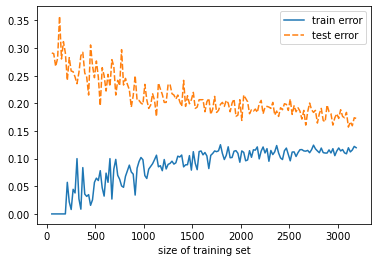

In [426]:
X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.2)
N = range(50,3201,20)
train_err = []
test_err = []
for n in N:
  X_tr,y_tr = shuffle(X_tr,y_tr,random_state=1)
  knn = tree.DecisionTreeClassifier(max_depth=10)   # specification
  knn.fit(X_tr[:n,:],y_tr[:n])   # training
  train_err.append(1-knn.score(X_tr[:n,:],y_tr[:n]))
  test_err.append(1-knn.score(X_te,y_te))

result = pd.DataFrame(
    {"train error":train_err,"test error":test_err},
    index=pd.Series(N,name="size of training set")
)
sns.lineplot(data=result)

In [480]:
X = pen[["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"]]
y = pen["species"]


In [481]:
knn = nbr.KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)

KNeighborsClassifier()

In [521]:
query = pd.DataFrame([[39,19,180,3750]],columns=X.columns)
dist,idx = knn.kneighbors(query)
idx[0]

array([  0, 143,  53, 100, 153])

In [522]:
y[idx[0]]

0         Adelie
143       Adelie
53        Adelie
100       Adelie
153    Chinstrap
Name: species, dtype: object

In [533]:
print("Predicted:")
print(knn.predict(X.loc[:5,:]))

print("\nData:")
print(y[:5])

Predicted:
['Adelie' 'Adelie' 'Chinstrap' 'Adelie' 'Chinstrap']

Data:
0    Adelie
1    Adelie
2    Adelie
4    Adelie
5    Adelie
Name: species, dtype: object


In [516]:
X.iloc[idx[0],:]

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
15,36.6,17.8,185.0,3700.0
150,36.0,17.1,187.0,3700.0
164,47.0,17.3,185.0,3700.0
96,38.1,18.6,190.0,3700.0
74,35.5,17.5,190.0,3700.0


In [448]:
from sklearn import svm
scores = cross_validate(svm.SVC(gamma=0.1),X,y,cv=kf)

In [449]:
scores["test_score"].mean()

0.8328502415458937

<AxesSubplot:xlabel='hyperparameter'>

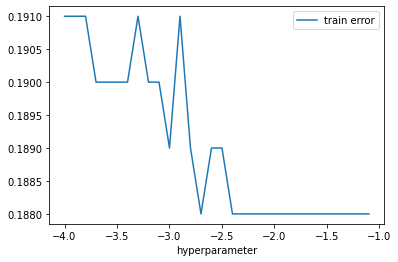

In [470]:
result = pd.DataFrame(
    {"train error":train_err},
    index=pd.Series(np.log10(Gamma),name="hyperparameter")
)
sns.lineplot(data=result)

In [479]:
from sklearn.model_selection import cross_val_score

K = range(1,9)
acc = []
for k in K:
    knn = nbr.KNeighborsClassifier(n_neighbors=k) 
    scores = cross_val_score(knn,X,y,cv=kf)
    acc.append(scores.mean())

for (k,a) in zip(K,acc):
    print("k =",k,":",f"{a:.2%}")


k= 1 : 75.60%
k= 2 : 82.10%
k= 3 : 79.54%
k= 4 : 82.17%
k= 5 : 81.18%
k= 6 : 82.42%
k= 7 : 81.93%
k= 8 : 82.49%


In [477]:
print(f"{acc[0]:.2%}")


75.60%


In [126]:
import numpy as np
from numpy.random import default_rng
rng = default_rng(1)
X = rng.random((10000,10))
y = np.array([np.sign(np.sum(x-0.5)) for x in X])

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import seaborn as sns
import pandas as pd

X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.1)
N = range(20,1801,20)
train_err = []
test_err = []
for n in N:
  X_tr,y_tr = shuffle(X_tr,y_tr,random_state=1)
  knn = neighbors.KNeighborsClassifier(n_neighbors=2)   # specification
  knn.fit(X_tr[:n,:],y_tr[:n])   # training
  train_err.append(1-knn.score(X_tr[:n,:],y_tr[:n]))
  test_err.append(1-knn.score(X_te,y_te))

result = pd.DataFrame(
    {"train error":train_err,"test error":test_err},
    index=pd.Series(N,name="size of training set")
)
sns.lineplot(data=result)

In [187]:
from sklearn import neighbors
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import seaborn as sns
import pandas as pd

X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.2)
n = 1000
err,kind = [],[]
t = nbr.KNeighborsClassifier(n_neighbors=30)
#t = tree.DecisionTreeClassifier(max_depth=3)
for i in range(200):
    X_tr,y_tr = shuffle(X_tr,y_tr,random_state=1)
    t.fit(X_tr[:n,:],y_tr[:n])   # training
    err.append(1-t.score(X_tr[:n,:],y_tr[:n]))
    err.append(1-t.score(X_te,y_te))
    kind.extend(["train","test"])

result = pd.DataFrame({"error":err,"kind":kind})

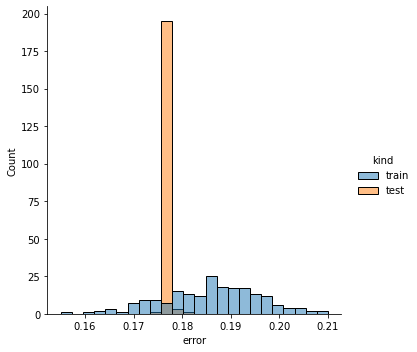

In [188]:
sns.displot(data=result,x="error",hue="kind",bins=24);


In [189]:
result.groupby("kind").describe()

error                                                              \
       count      mean       std       min       25%       50%       75%   
kind                                                                       
test   200.0  0.177548  0.000499  0.175121  0.177536  0.177536  0.177536   
train  200.0  0.186080  0.009995  0.155000  0.179750  0.187000  0.192000   

                 
            max  
kind             
test   0.182367  
train  0.210000

In [7]:
r = pd.Series([1,2,3,4])
r.values

array([1, 2, 3, 4])

In [200]:
from sklearn import neighbors
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import seaborn as sns
import pandas as pd

X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.2)
n = 500
err,depth,kind = [],[],[]
D = range(1,16)
for d in D:
    #knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    t = tree.DecisionTreeClassifier(max_depth=d)   
    for i in range(100):
        X_tr,y_tr = shuffle(X_tr,y_tr,random_state=1)
        t.fit(X_tr[:n,:],y_tr[:n])   # training
        err.append(1-t.score(X_tr[:n,:],y_tr[:n]))
        err.append(1-t.score(X_te,y_te))
        depth.extend([d,d])
        kind.extend(["train","test"])

result = pd.DataFrame({"error":err,"kind":kind,"depth":depth})

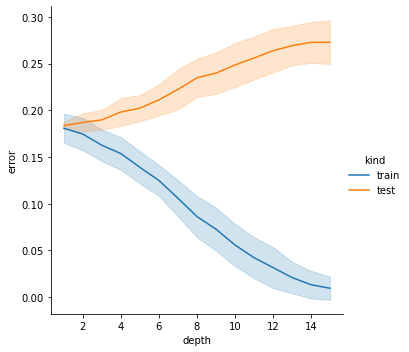

In [201]:
sns.relplot(data=result,x="depth",y="error",kind="line",hue="kind",ci="sd");

In [97]:
from sklearn import neighbors
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import seaborn as sns
import pandas as pd

X_tr, X_te, y_tr, y_te = X[:80,:],X[80:100,:],y[:80],y[80:100]
n = 80
err,n_neigh,kind = [],[],[]
K = range(2,40,4)
for k in K:
    # knn = tree.DecisionTreeClassifier(max_depth=k)   # specification
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_tr[:n,:],y_tr[:n])   # training
    err.append(1-knn.score(X_tr[:n,:],y_tr[:n]))
    err.append(1-knn.score(X_te,y_te))
    n_neigh.extend([k,k])
    kind.extend(["train","test"])

result = pd.DataFrame({"error":err,"kind":kind,"k":n_neigh})

In [116]:
knn = neighbors.KNeighborsClassifier(n_neighbors=30)
knn.fit(X_tr[:,:2],y_tr)   # training
knn.score(X_tr[:,:2],y_tr)

0.9125

In [152]:
X

array([[ 3.6000e+03,  2.3750e+03,  7.6310e+01, ..., -1.0000e+00,
        -1.0000e+00,  1.0000e+00],
       [ 2.3000e+04,  2.3000e+04,  7.6789e+02, ..., -1.0000e+00,
        -1.0000e+00,  1.0000e+00],
       [ 7.0000e+03,  7.0000e+03,  2.2584e+02, ..., -1.0000e+00,
        -1.0000e+00,  1.0000e+00],
       ...,
       [ 1.0000e+04,  1.0000e+04,  3.1111e+02, ..., -1.0000e+00,
        -1.0000e+00,  1.0000e+00],
       [ 3.5000e+03,  3.5000e+03,  1.1961e+02, ..., -1.0000e+00,
        -1.0000e+00,  1.0000e+00],
       [ 8.3250e+03,  8.3250e+03,  2.8248e+02, ..., -1.0000e+00,
        -1.0000e+00,  1.0000e+00]])

In [110]:
X_tr, X_te, y_tr, y_te = X[:80,:],X[80:100,:],y[:80],y[80:100]


In [118]:
knn.predict(X_tr[:,:2])-y_tr

array([-2.,  0.,  0.,  0., -2.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -2.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -2.,  0.,  0.,  0.,
        0., -2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.])

In [6]:
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target
X.shape

(1797, 64)

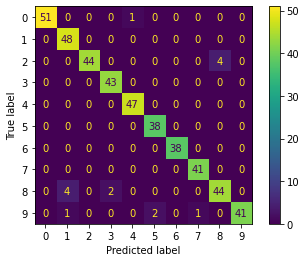

In [30]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=0.25,random_state=7)

knn = neighbors.KNeighborsClassifier(n_neighbors=16)
knn.fit(X_tr,y_tr)
yhat = knn.predict(X_te)

C = metrics.confusion_matrix(y_te,yhat)
metrics.ConfusionMatrixDisplay(C).plot();

In [34]:
prec = metrics.precision_score(y_te,yhat,average=None)
print([f"{p:.1%}" for p in prec])

['100.0%', '90.6%', '100.0%', '95.6%', '97.9%', '95.0%', '100.0%', '97.6%', '91.7%', '100.0%']


In [31]:
metrics.f1_score(y_te,yhat,average=None)

array([0.99029126, 0.95049505, 0.95652174, 0.97727273, 0.98947368,
       0.97435897, 1.        , 0.98795181, 0.89795918, 0.95348837])

In [25]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [37]:
mac = metrics.precision_score(y_te,yhat,average="macro")
print([mac,prec.mean()])

[0.9683239742437856, 0.9683239742437856]


In [45]:
import seaborn as sns
penguins = sns.load_dataset("penguins")
penguins = penguins.dropna()
penguins
X = penguins[["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"]]
y = penguins["species"]
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=16)

In [201]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler   # converts to z-scores


X = forest["data"][:30000,:10]
y = forest["target"][:30000]
X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.2)

K = range(2,11)
acc = []
kf = KFold(n_splits=6,shuffle=True,random_state=0)
for k in K:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    pipe = make_pipeline(StandardScaler(),knn)
    scores = cross_val_score(pipe,X_tr,y_tr,cv=kf,scoring="balanced_accuracy")
    acc.append(scores.mean())

for (k,a) in zip(K,acc):
    print("k =",k,":",f"{a:.2%}")

k = 2 : 75.02%
k = 3 : 78.13%
k = 4 : 77.43%
k = 5 : 77.97%
k = 6 : 77.67%
k = 7 : 77.69%
k = 8 : 77.19%
k = 9 : 77.04%
k = 10 : 76.75%


In [197]:
X = forest["data"][:20000,:10]
y = forest["target"][:20000]
X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.2)

kf = KFold(n_splits=6,shuffle=True,random_state=0)
knn = neighbors.KNeighborsClassifier(n_neighbors=4)
pipe = make_pipeline(StandardScaler(),knn)
scores = cross_val_score(pipe,X_tr,y_tr,cv=kf,scoring="balanced_accuracy")

print(scores)

[0.76223001 0.75936648 0.77391623 0.76954516 0.7428635  0.75551178]


In [48]:
col=X.columns

In [50]:
xdf=pd.DataFrame([x_new],columns=col[[3,0,2,1]])

In [52]:
import numpy as np
from sklearn import neighbors as nbr 

X = np.loadtxt("data.csv",delimiter=",")
y = np.loadtxt("labels.csv",delimiter=",")
knn = nbr.KNeighborsClassifier(n_neighbors=11)   # specification
knn.fit(X,y) 
print(f"accuracy is {knn.score(X,y):.1%}")


accuracy is 83.2%


In [53]:
import numpy as np
X = np.loadtxt("data.csv",delimiter=",")
print("feature matrix has shape",X.shape)
y = np.loadtxt("labels.csv",delimiter=",")
print("label vector has shape",y.shape)


feature matrix has shape (4140, 15)
label vector has shape (4140,)


In [54]:
from sklearn import neighbors as nbr 
knn = nbr.KNeighborsClassifier(n_neighbors=11)   # specification
knn.fit(X,y)            # training


KNeighborsClassifier(n_neighbors=11)

In [58]:
Xq = 100*np.ones((1,15))
knn.predict(Xq*15)

array([-1.])

In [60]:
from sklearn import metrics

acc = metrics.accuracy_score(y,yhat)
print(f"accuracy is {acc:.1%}")


ValueError: Found input variables with inconsistent numbers of samples: [4140, 450]

In [61]:
from sklearn import neighbors 
?knn.score()

Object `knn.score()` not found.


In [2]:
from sklearn import neighbors 
import seaborn as sns
penguins = sns.load_dataset("penguins")
penguins = penguins.dropna()
X = penguins[["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"]]
y = penguins["species"]
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y);
import pandas as pd
x_new = [39,19,180,3750]
xdf = pd.DataFrame([x_new],columns=X.columns)
xdf


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39,19,180,3750


In [3]:
knn.predict(xdf)

array(['Adelie'], dtype=object)

In [12]:
import seaborn as sns
import pandas as pd
penguins = sns.load_dataset("penguins")
penguins = penguins.dropna()
col = ["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"]
X = penguins[col]
y = penguins["species"]
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
Z = X.transform( lambda x: (x-x.mean())/x.std() )
Z_tr, Z_te, y_tr, y_te = train_test_split(Z,y,test_size=0.2)
knn.fit(Z_tr,y_tr)

yhat = knn.predict(Z_te)
print(classification_report(y_te,yhat))

              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.98        30
   Chinstrap       1.00      0.90      0.95        10
      Gentoo       1.00      1.00      1.00        27

    accuracy                           0.99        67
   macro avg       0.99      0.97      0.98        67
weighted avg       0.99      0.99      0.98        67



In [161]:
from sklearn import datasets

forest = datasets.fetch_covtype()
X = forest["data"][:250000,:8]
y = forest["target"][:250000]

In [164]:
from sklearn import neighbors,metrics
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import tree
import numpy as np

X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.08,shuffle=True,random_state=0)

n = 5000             # size of the training subset
err,kind,depth = [],[],[]
for d in range(2,13,1):
    for i in range(50):
        X_tr,y_tr = shuffle(X_tr,y_tr,random_state=0)
        XX,yy = X_tr[:n,:],y_tr[:n]
        dt = tree.DecisionTreeClassifier(max_depth=d) 
        dt.fit(XX,yy)
        err.append(1-dt.score(XX,yy))
        err.append(1-dt.score(X_te,y_te))
        kind.extend(["train","test"])
        depth.extend([d,d])

result = pd.DataFrame({"error":err,"kind":kind,"depth":depth})


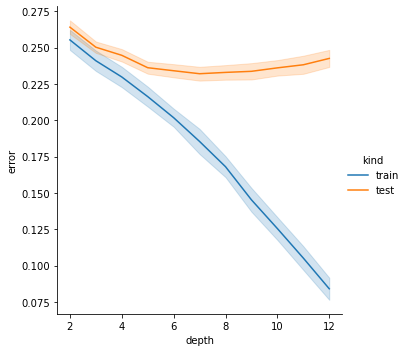

In [165]:
result = pd.DataFrame({"error":err,"kind":kind,"depth":depth})
sns.relplot(data=result,x="depth",y="error",kind="line",ci="sd",hue="kind")

In [103]:
X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=0)


In [151]:
X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.1,shuffle=True,random_state=0)

n = 5000             # size of the training subset
XX,yy = X_tr[:n,:],y_tr[:n]
D = range(2,13,1)
err,kind,depth = [],[],[]
for d in D:
    for i in range(50):
        dt = tree.DecisionTreeClassifier(max_depth=d) 
        dt.fit(XX,yy)
        err.append(1-dt.score(XX,yy))
        err.append(1-dt.score(X_te,y_te))
        kind.extend(["train","test"])
        depth.extend([d,d])
        X_tr,y_tr = shuffle(X_tr,y_tr,random_state=0)
        XX[:],yy[:] = X_tr[:n,:],y_tr[:n]

result = pd.DataFrame({"error":err,"kind":kind,"depth":depth})


In [274]:
import numpy as np
X = np.loadtxt("data.csv",delimiter=",")
print("feature matrix has shape",X.shape)
y = np.loadtxt("labels.csv",delimiter=",")
print("label vector has shape",y.shape)


feature matrix has shape (4140, 15)
label vector has shape (4140,)


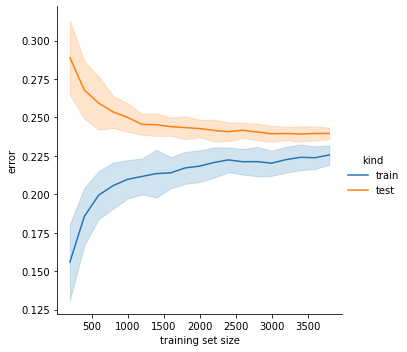

In [211]:
from sklearn import datasets

forest = datasets.fetch_covtype()
X = forest["data"][:200000,:8]
y = forest["target"][:200000]

from sklearn import tree

X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.05,shuffle=True,random_state=0)

N = range(200,4000,200)             # size of the training subset
err,kind,length = [],[],[]
dt = tree.DecisionTreeClassifier(max_depth=4) 
for n in N:
    for i in range(50):
        X_tr,y_tr = shuffle(X_tr,y_tr,random_state=1)
        XX,yy = X_tr[:n,:],y_tr[:n]
        dt.fit(XX,yy)
        err.append(1-dt.score(XX,yy))
        err.append(1-dt.score(X_te,y_te))
        kind.extend(["train","test"])
        length.extend([n,n])

result = pd.DataFrame({"error":err,"kind":kind,"training set size":length})
sns.relplot(data=result,x="training set size",y="error",kind="line",ci="sd",hue="kind")

In [271]:
X_te.shape
forest = datasets.fetch_covtype()
X = forest["data"][:250000,:8]
y = forest["target"][:250000]


In [268]:
from sklearn.model_selection import cross_validate,KFold
X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.05,shuffle=True,random_state=0)

n = 20000             # size of the training subset
X_tr,y_tr = X_tr[:n,:],y_tr[:n]
depth = range(2,21,1)
kind = ["train"]*6
kind.extend(["test"]*6)
result = pd.DataFrame()
kf = KFold(n_splits=6,shuffle=True,random_state=0)
for d in depth:
    dt = tree.DecisionTreeClassifier(max_depth=d)
    cv = cross_validate(dt,X_tr,y_tr,cv=kf,return_train_score=True)
    err = np.hstack((1-cv["train_score"],1-cv["test_score"]))
    keep = {"depth":d, "error":err,"kind":kind} 
    result = pd.concat((result,pd.DataFrame(keep)),ignore_index=True)

sns.relplot(data=result,x="depth",y="error",kind="line",ci="sd",hue="kind");


In [272]:
from sklearn.model_selection import cross_validate,KFold
X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.05)

kf = KFold(n_splits=6,shuffle=True,random_state=0)
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
pipe = make_pipeline(StandardScaler(),knn)
scores = cross_validate(pipe,X_tr,y_tr,cv=kf,scoring="balanced_accuracy")

print(scores["test_score"])


[0.73684347 0.74162961 0.74303044 0.73410987 0.73832602 0.74294791]


In [236]:
cv["test_score"]

array([0.81202632, 0.81013158, 0.81286842, 0.81018421, 0.8125    ])

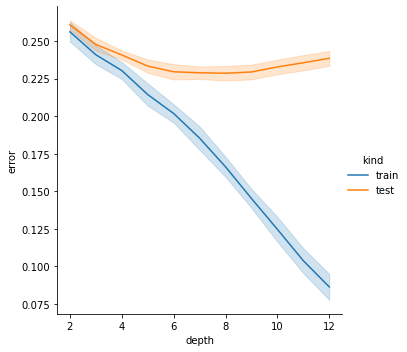

In [273]:
n = 5000             # size of the training subset
err,kind,depth = [],[],[]
for d in range(2,13,1):
    for i in range(50):
        X_tr,y_tr = shuffle(X_tr,y_tr,random_state=0)
        XX,yy = X_tr[:n,:],y_tr[:n]
        dt = tree.DecisionTreeClassifier(max_depth=d) 
        dt.fit(XX,yy)
        err.append(1-dt.score(XX,yy))
        err.append(1-dt.score(X_te,y_te))
        kind.extend(["train","test"])
        depth.extend([d,d])

result = pd.DataFrame({"error":err,"kind":kind,"depth":depth})
sns.relplot(data=result,x="depth",y="error",kind="line",ci="sd",hue="kind");

In [4]:
import numpy as np
X = np.loadtxt("data.csv",delimiter=",")
y = np.loadtxt("labels.csv",delimiter=",")

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.2)

svc = svm.SVC()
svc.fit(X_tr,y_tr)

print("train accuracy:",svc.score(X_tr,y_tr))
print("test accuracy:",svc.score(X_te,y_te))

train accuracy: 0.8173309178743962
test accuracy: 0.8297101449275363


In [15]:
svc = svm.SVC(C=100)
svc.fit(X_tr,y_tr)

print("train accuracy:",svc.score(X_tr,y_tr))
print("test accuracy:",svc.score(X_te,y_te))

yhat = svc.predict(X_te)
print(confusion_matrix(y_te,yhat))

train accuracy: 0.8508454106280193
test accuracy: 0.8623188405797102
[[685   0]
 [114  29]]


In [18]:
svc = svm.SVC(C=1000)
svc.fit(X_tr,y_tr)
svc.score(X_tr,y_tr)

0.8541666666666666

In [19]:
print("train accuracy:",svc.score(X_tr,y_tr))
print("test accuracy:",svc.score(X_te,y_te))


train accuracy: 0.8541666666666666
test accuracy: 0.8671497584541062


In [17]:
print(classification_report(y_te,yhat))

              precision    recall  f1-score   support

        -1.0       0.86      1.00      0.92       685
         1.0       1.00      0.20      0.34       143

    accuracy                           0.86       828
   macro avg       0.93      0.60      0.63       828
weighted avg       0.88      0.86      0.82       828



In [37]:
import numpy as np
X = np.loadtxt("data.csv",delimiter=",")
y = np.loadtxt("labels.csv",delimiter=",")
X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.2)

from sklearn import tree
from sklearn.metrics import confusion_matrix,classification_report

dt = tree.DecisionTreeClassifier(max_depth=5)
dt.fit(X_tr,y_tr)
yhat = dt.predict(X_te)
print(confusion_matrix(y_te,yhat))

[[676   5]
 [126  21]]


In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_tr,y_tr)

yhat = rf.predict(X_te)
print(confusion_matrix(y_te,yhat))

[[679   2]
 [124  23]]
